In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import spinesTS
spinesTS.__version__

'0.3.7'

In [3]:
from spinesTS.preprocessing import split_series
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [4]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import *
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [5]:
series_data = BuiltInSeriesData()

+----+----------------------+----------------------------------------------------------------------+
|    | ds name              | columns                                                              |
+----+----------------------+----------------------------------------------------------------------+
|  0 | AirPassengers        | Month, #Passengers                                                   |
|  1 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  2 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  3 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  4 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  5 | Electric_Production  | date, value                                                          |
|  6 | M3_monthly_FTS       | series_id, method_id, forecast, horizon, timestamp, origin_ti

In [6]:
cs = series_data['Electric_Production']

x_train, x_test, y_train, y_test = split_series(cs['value'], cs['value'], 128, 30, train_size=0.9)

In [7]:
x_train.shape, x_test.shape

((216, 128), (24, 128))

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

# StackingRNN

Using cpu backend
Epoch 1/3000  
7/7 - p0 - loss: 0.6053 - mae: 0.6980 - val_loss: 0.5929 - val_mae: 0.5929 - 0.14s/epoch - 0.020s/step
Epoch 2/3000  
7/7 - p0 - loss: 0.5793 - mae: 0.4985 - val_loss: 0.5757 - val_mae: 0.5757 - 0.13s/epoch - 0.019s/step
Epoch 3/3000  
7/7 - p0 - loss: 0.5651 - mae: 0.4761 - val_loss: 0.5637 - val_mae: 0.5637 - 0.15s/epoch - 0.021s/step
Epoch 4/3000  
7/7 - p0 - loss: 0.5558 - mae: 0.4627 - val_loss: 0.5531 - val_mae: 0.5531 - 0.13s/epoch - 0.018s/step
Epoch 5/3000  
7/7 - p0 - loss: 0.5494 - mae: 0.4543 - val_loss: 0.5460 - val_mae: 0.5460 - 0.15s/epoch - 0.022s/step
Epoch 6/3000  
7/7 - p0 - loss: 0.5405 - mae: 0.4439 - val_loss: 0.5374 - val_mae: 0.5374 - 0.13s/epoch - 0.019s/step
Epoch 7/3000  
7/7 - p0 - loss: 0.5317 - mae: 0.4377 - val_loss: 0.5289 - val_mae: 0.5289 - 0.13s/epoch - 0.018s/step
Epoch 8/3000  
7/7 - p0 - loss: 0.5255 - mae: 0.4312 - val_loss: 0.5226 - val_mae: 0.5226 - 0.14s/epoch - 0.020s/step
Epoch 9/3000  
7/7 - p0 - loss: 0.5172

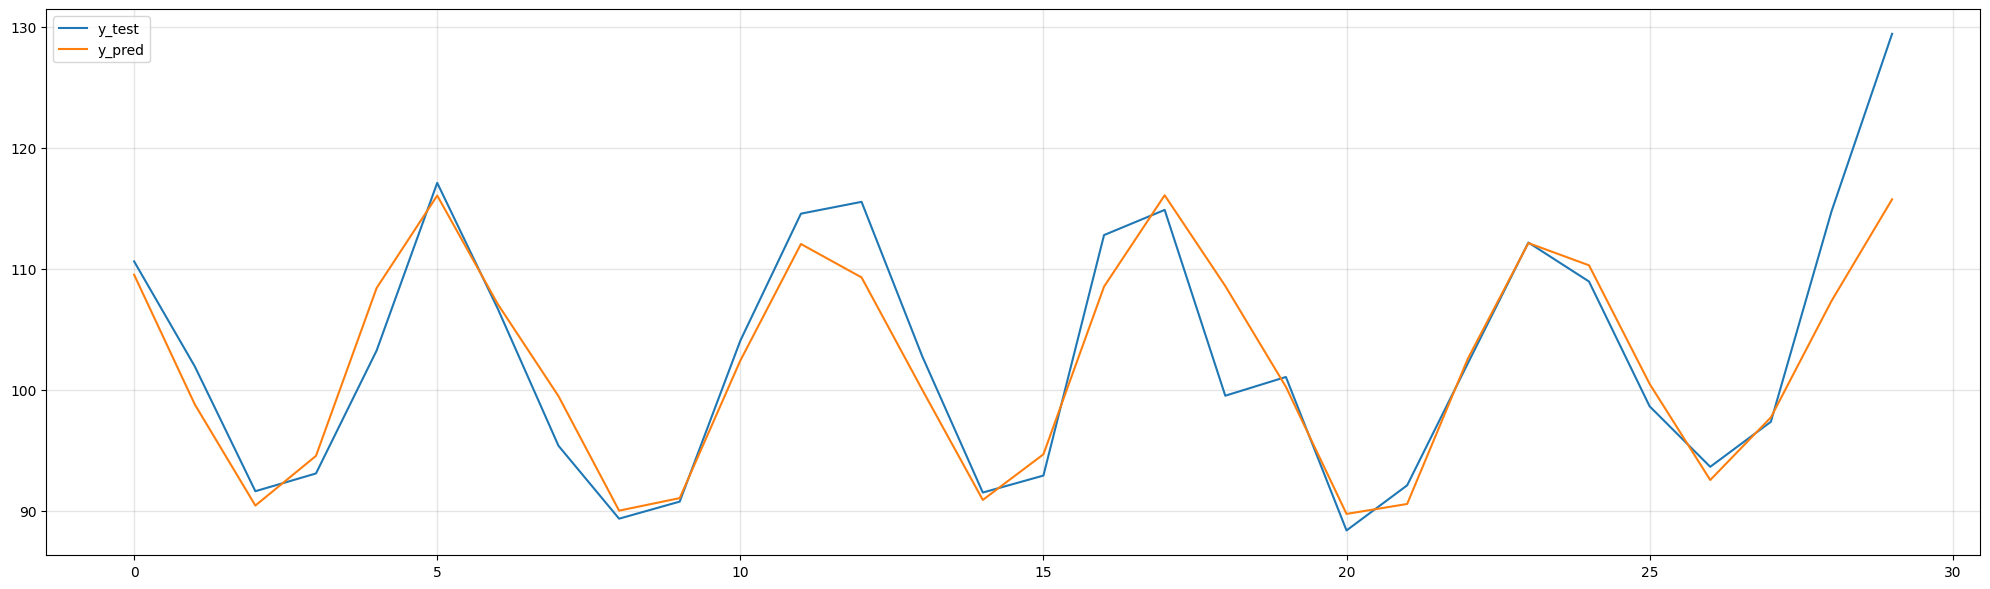

In [13]:
model = StackingRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1,
                    device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler=None)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# GAUNet

Using cpu backend
Epoch 1/3000  
7/7 - p0 - loss: 0.3526 - mae: 0.3783 - val_loss: 0.3122 - val_mae: 0.3122 - 0.05s/epoch - 0.007s/step
Epoch 2/3000  
7/7 - p0 - loss: 0.2326 - mae: 0.2113 - val_loss: 0.2372 - val_mae: 0.2372 - 0.03s/epoch - 0.005s/step
Epoch 3/3000  
7/7 - p1 - loss: 0.2297 - mae: 0.1759 - val_loss: 0.2436 - val_mae: 0.2436 - 0.03s/epoch - 0.004s/step
Epoch 4/3000  
7/7 - p0 - loss: 0.1822 - mae: 0.1527 - val_loss: 0.1955 - val_mae: 0.1955 - 0.03s/epoch - 0.005s/step
Epoch 5/3000  
7/7 - p0 - loss: 0.1441 - mae: 0.1343 - val_loss: 0.1508 - val_mae: 0.1508 - 0.03s/epoch - 0.004s/step
Epoch 6/3000  
7/7 - p0 - loss: 0.1338 - mae: 0.1235 - val_loss: 0.1395 - val_mae: 0.1395 - 0.03s/epoch - 0.005s/step
Epoch 7/3000  
7/7 - p0 - loss: 0.1271 - mae: 0.1117 - val_loss: 0.1371 - val_mae: 0.1371 - 0.03s/epoch - 0.005s/step
Epoch 8/3000  
7/7 - p0 - loss: 0.1114 - mae: 0.1005 - val_loss: 0.1214 - val_mae: 0.1214 - 0.04s/epoch - 0.005s/step
Epoch 9/3000  
7/7 - p0 - loss: 0.1040

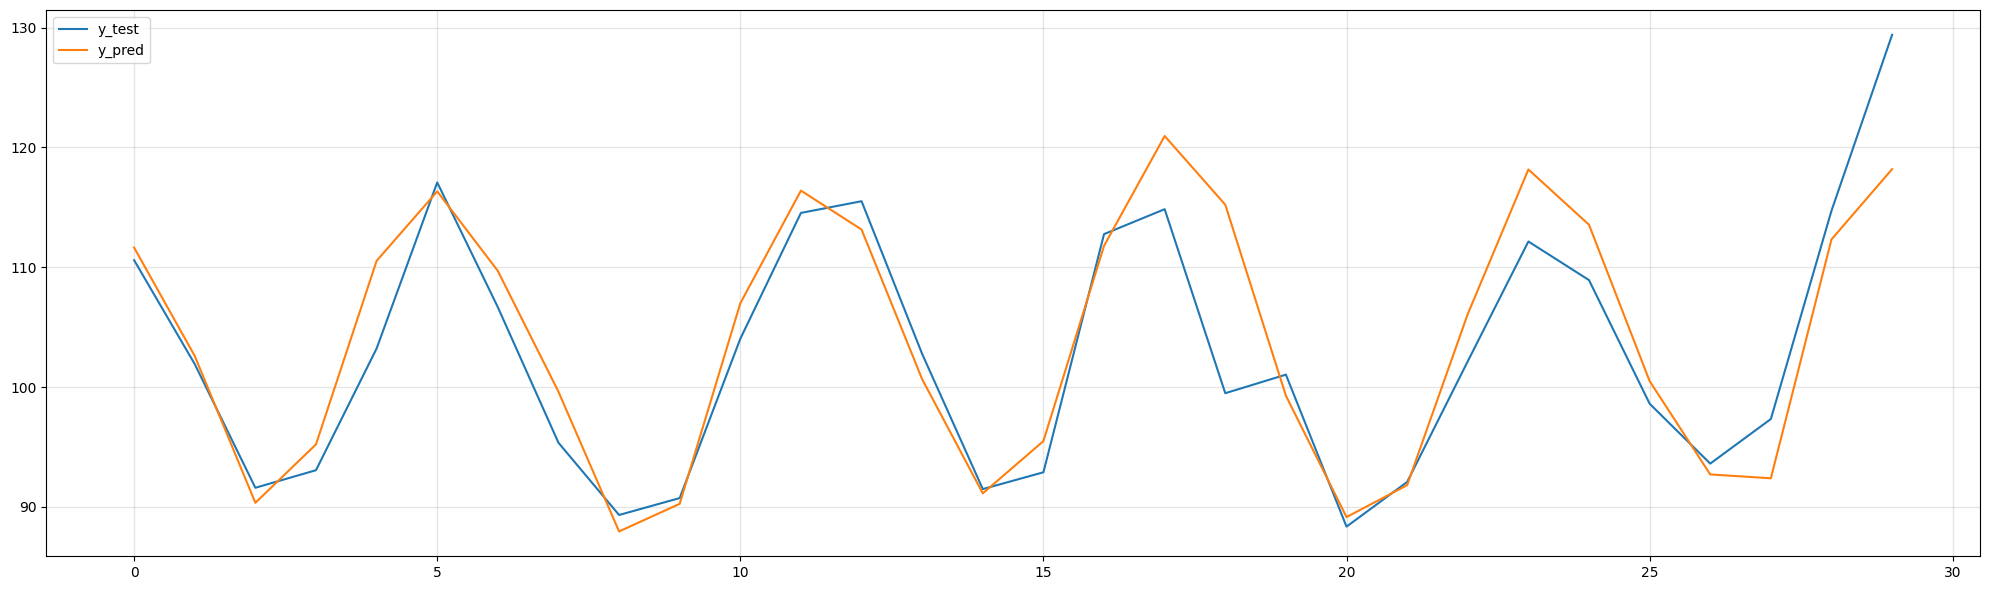

In [19]:
model = GAUNet(128, 30, random_seed=42, flip_features=False, learning_rate=0.001, level=2, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler=None)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# Time2VecNet

Using cpu backend
Epoch 1/3000  
7/7 - p0 - loss: 0.2998 - mae: 0.3687 - val_loss: 0.2898 - val_mae: 0.2898 - 0.04s/epoch - 0.006s/step
Epoch 2/3000  
7/7 - p0 - loss: 0.2420 - mae: 0.2415 - val_loss: 0.2505 - val_mae: 0.2505 - 0.03s/epoch - 0.004s/step
Epoch 3/3000  
7/7 - p0 - loss: 0.2044 - mae: 0.2027 - val_loss: 0.2173 - val_mae: 0.2173 - 0.03s/epoch - 0.004s/step
Epoch 4/3000  
7/7 - p0 - loss: 0.1559 - mae: 0.1566 - val_loss: 0.1842 - val_mae: 0.1842 - 0.03s/epoch - 0.004s/step
Epoch 5/3000  
7/7 - p0 - loss: 0.1354 - mae: 0.1354 - val_loss: 0.1653 - val_mae: 0.1653 - 0.03s/epoch - 0.004s/step
Epoch 6/3000  
7/7 - p0 - loss: 0.1189 - mae: 0.1185 - val_loss: 0.1533 - val_mae: 0.1533 - 0.03s/epoch - 0.004s/step
Epoch 7/3000  
7/7 - p0 - loss: 0.1092 - mae: 0.1068 - val_loss: 0.1476 - val_mae: 0.1476 - 0.03s/epoch - 0.004s/step
Epoch 8/3000  
7/7 - p0 - loss: 0.0950 - mae: 0.0974 - val_loss: 0.1396 - val_mae: 0.1396 - 0.03s/epoch - 0.004s/step
Epoch 9/3000  
7/7 - p0 - loss: 0.0892

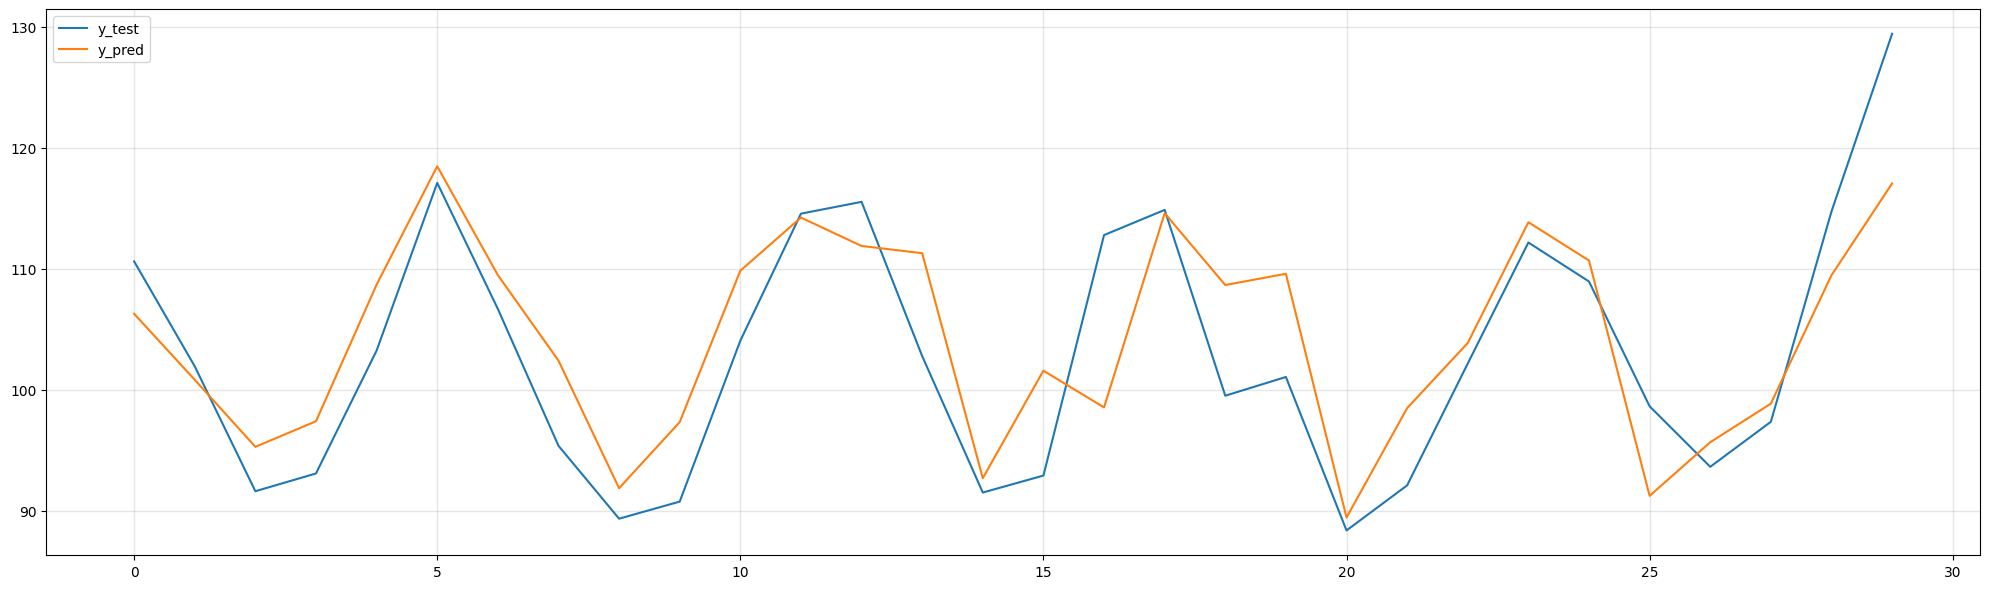

In [20]:
model = Time2VecNet(128, 30, random_seed=42, flip_features=False, learning_rate=0.001, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler='ReduceLROnPlateau')

y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))